# Wind Data Analysis

`wind_data.csv` is a comma-separated file containing hourly average wind speed and wind direction data from a particular site over a year. The wind speed data was recorded at 10-m height.

`power_curve.csv` is a comma-separated file containing power vs wind speed of a given wind turbine.

Let's see what is inside these file using python Panda library interactively.

## Display CSV Files

In [1]:
# The 4 lines below are the libraries that we need to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from math import radians
import datetime as dt

# Read data from csv file
filename = 'wind_data.csv'
wd_df = pd.read_csv(filename, sep=',')
                 
print(wd_df.head(),'\n') # Print the first 5 lines
print(wd_df.tail(),'\n') # Print the last 5 lines
print(wd_df[0:2],'\n')   # Print from row 0 to row 2
print(wd_df['wind direction'][20:22], '\n') # Limit to 'wind direction'

   wind direction  wind speed @ 10m
0         132.243             3.685
1         317.834            18.447
2         704.609             5.493
3        1187.513            15.084
4         127.010             6.876 

      wind direction  wind speed @ 10m
8755         472.865             2.358
8756         480.165             5.546
8757        1558.339             6.277
8758        1065.526            14.149
8759         495.802            21.141 

   wind direction  wind speed @ 10m
0         132.243             3.685
1         317.834            18.447 

20    367.559
21    493.738
Name: wind direction, dtype: float64 



In [2]:
wd_df

,wind direction,wind speed @ 10m
0,132.243,3.685
1,317.834,18.447
2,704.609,5.493
3,1187.513,15.084
4,127.010,6.876
5,397.244,6.402
6,924.964,7.748
7,3511.557,13.543
8,367.409,3.624
9,644.470,8.849


Note that the first column is not found in the original csv file. It is automatically generated to index the file uniquely.

I would like re-arrange the column to show wind speed first than wind direction.

In [3]:
wd_df = wd_df[['wind speed @ 10m', 'wind direction']]
wd_df[0:2]

,wind speed @ 10m,wind direction
0,3.685,132.243
1,18.447,317.834


In [4]:
pc_df = pd.read_csv('power_curve.csv') # default 'sep' is ',', so I omit the argument
pc_df[0:20]

,Wind speed (m/s),Output power (kW)
0,0,0
1,1,0
2,2,0
3,3,0
4,4,80
5,5,140
6,6,360
7,7,610
8,8,1000
9,9,1470


Since the wind speed could be used as index, we do not need another column as index. Let's perform re-load.

In [5]:
pc_df = pd.read_csv('power_curve.csv',index_col='Wind speed (m/s)')
pc_df[4:6]

,Output power (kW)
Wind speed (m/s),
4,80
5,140


The column `Output power (kW)` in array format could be referred via `pc_df['Output power (kW)'].values`

However, `Wind speed (m/s)` in array format could only be referred via `pc_df.index`

In [6]:
print(f'pc_df["Output power (kW).values"] = {pc_df["Output power (kW)"].values}')
print(f'pc_df.index = {pc_df.index}')

pc_df["Output power (kW).values"] = [   0    0    0    0   80  140  360  610 1000 1470 1900 2320 2690 2850
 2950 3000 3000 3000 3000 3000 3000 3000 3000 3000 3000 3000]
pc_df.index = Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25],
           dtype='int64', name='Wind speed (m/s)')


## Display Data in Time-series Plot

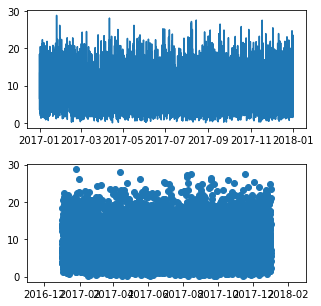

In [7]:
# To plot a time-series data, I need convert the index column 'wd_df'
# to time. Let's start the date on 2017-Jan-01 00:00:00
d = dt.datetime(2017, 1, 1, 0, 0, 0, 0)
x = [d + dt.timedelta(hours=i) for i in range(wd_df['wind speed @ 10m'].count())]

# Let's create two plots vertically
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(wspace=0.3, hspace=0.3) ## Adjust spacing

ax1 = fig.add_subplot(211)
ax1.plot(x, wd_df['wind speed @ 10m'].values)

ax2 = fig.add_subplot(212)
ax2.scatter(x, wd_df['wind speed @ 10m'].values)

These plots are not useful as all the data overlap one another.

## Display Data in Circular Scatter Plot

We need to visualize the wind speed and wind direction together. Let's use circular scatter plot.

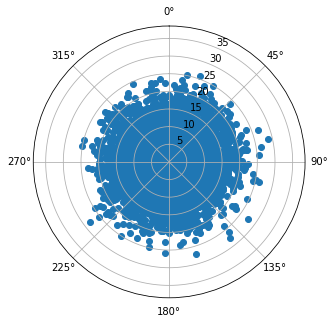

In [8]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, polar=True)
ax.scatter([radians(x) for x in wd_df['wind direction'].values], 
           wd_df['wind speed @ 10m'].values) # Convert angle to radian
ax.set_theta_zero_location('N') # Theta's zero is at North 
ax.set_theta_direction(-1) # and theta increases in clockwise direction

The plot is also not useful as we have too many data in the plot, overlapping one another.

## Windrose

We need to install windrose package. Open a command prompt and enter

```
pip install windrose
```

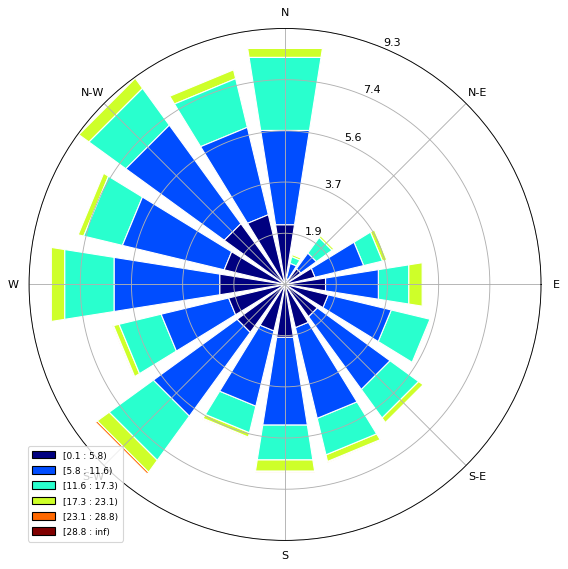

In [9]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(wd_df['wind direction'], wd_df['wind speed @ 10m'], 
       normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

The prevailing wind comes from the Northwestern direction.

## Display Wind Speed Frequency Distribution Data using Histogram

Let's group the wind speed into bins of wind speed, such as \[0, 1), \[1, 2), \[2, 3), ...

Then count number of occurances (i.e., frequency) in each bin. We then plot frequency versus bins.

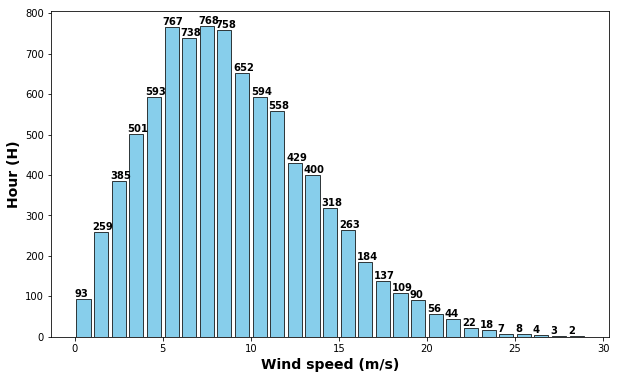

In [10]:
# The maximum wind speed is ws_df['wind speed @ 10m'].max()
n = int(wd_df['wind speed @ 10m'].max() + 1)

# Create bins
bins = np.arange(0.0, n+1, 1)

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)
wsd = ax1.hist(wd_df['wind speed @ 10m'], bins=bins, edgecolor='black', 
               linewidth=0.75, color="skyblue", rwidth=0.8)
ax1.set_xlabel('Wind speed (m/s)', fontweight='bold', fontsize=14)
ax1.set_ylabel('Hour (H)', fontweight='bold', fontsize=14)
  
# Draw the hours in the histogram
for i in range(0, bins.size-1):
  ax1.text(wsd[1][i], wsd[0][i]+5, str(int(wsd[0][i])), fontweight='bold')

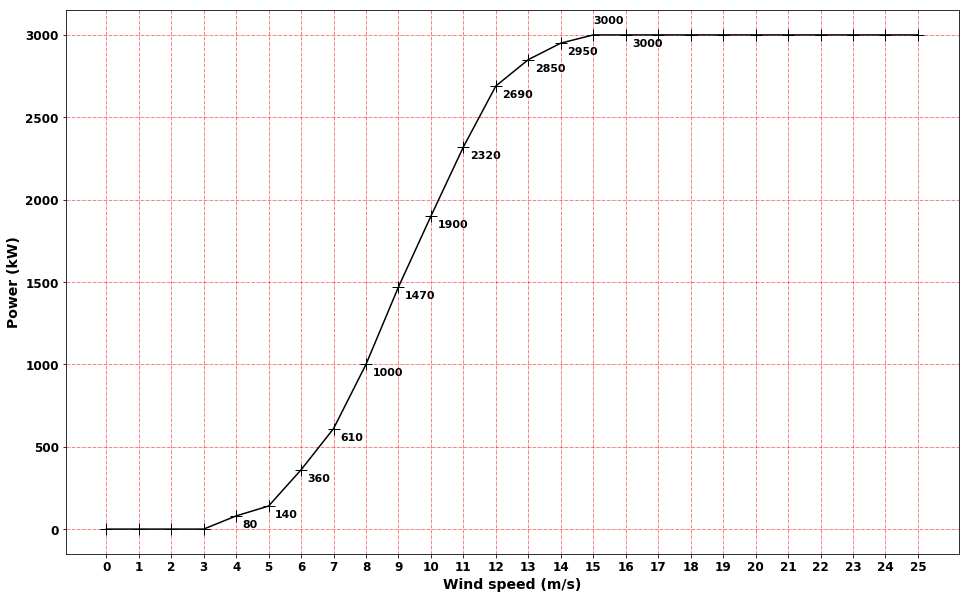

In [11]:
fig = plt.figure(figsize=(16,10))
ax2 = fig.add_subplot(111)
ax2.plot(pc_df.index, pc_df['Output power (kW)'].values, 'b+',
         color='black', linewidth=1.5, linestyle='solid',
        markersize=12.0)
ax2.set_xlabel('Wind speed (m/s)', fontweight='bold', fontsize=14)
ax2.set_ylabel('Power (kW)', fontweight='bold', fontsize=14)

ax2.set_xticks(ticks=list(pc_df.index))
font1 = {'fontsize':12, 'fontweight':'bold'}
ax2.set_yticklabels([int(x) for x in ax2.get_yticks()], font1)
ax2.set_xticklabels(list(pc_df.index), font1)

ax2.grid(color='r', linestyle='-.', linewidth=0.5)

count3000 = 0
font2 = {'fontsize':11, 'fontweight':'bold'}
for i, j in zip(pc_df.index, pc_df['Output power (kW)'].values):
  if (j == 0):
    continue
  if j >= 3000:
    count3000 += 1
  if count3000 == 1:
    ax2.text(i, j+70, str(j), font2)
  elif count3000 == 2:
    ax2.text(i+0.2, j-70, str(j), font2)
  elif count3000 > 2:
    break
  else:
    ax2.text(i+0.2, j-70, str(j), font2)

The data make much sense now.

## Wind Speed at 100 metres

In [12]:
# Estimate wind speed at 100m
import math

def estimate_ws(ref_ws, new_h, ref_h, roughness):
  return ref_ws * math.log1p(new_h/roughness) / math.log1p(ref_h/roughness)

# Disable chained_assignement warning
pd.options.mode.chained_assignment = None  # default='warn'

wd_df['wind speed @ 100m'] = wd_df['wind speed @ 10m'].apply(\
                                lambda x: estimate_ws(x, 100, 10, 0.01))
wd_df.head()

,wind speed @ 10m,wind direction,wind speed @ 100m
0,3.685,132.243,4.912676
1,18.447,317.834,24.592709
2,5.493,704.609,7.323020
3,15.084,1187.513,20.109309
4,6.876,127.010,9.166773


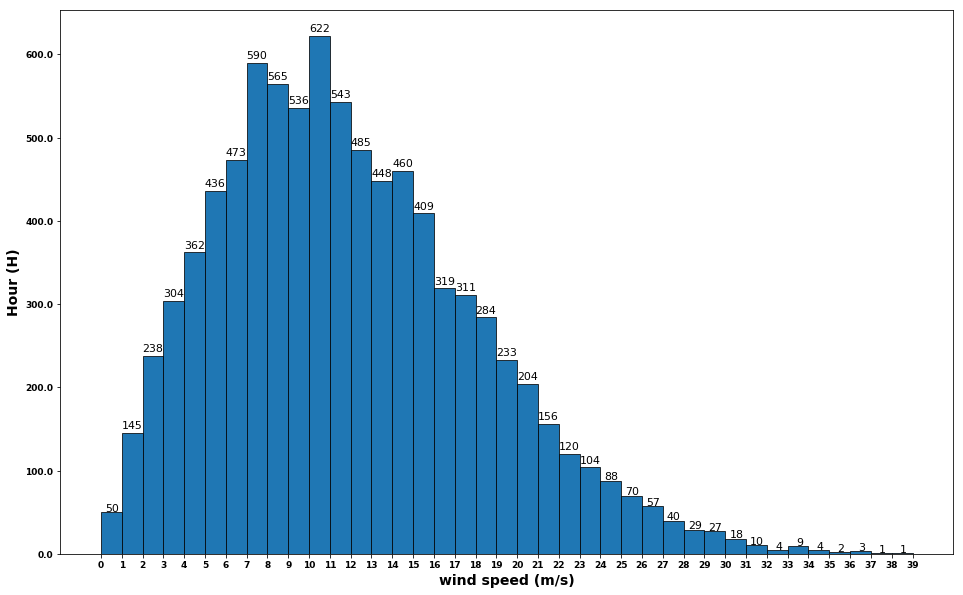

In [13]:
# Draw a frequency distribution for the wind speed at 100 m

# The maximum wind speed is ws_df['wind speed @ 10m'].max()
n = int(wd_df['wind speed @ 100m'].max() + 1)

# Create bins
bins = np.arange(0.0, n+1, 1)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)

# Keep a copy of the wind speed distribution to access the data
wsd = ax.hist(wd_df['wind speed @ 100m'], bins=bins, edgecolor='black', linewidth=0.75)
ax.set_xlabel('wind speed (m/s)', fontweight='bold', fontsize=14)
ax.set_ylabel('Hour (H)', fontweight='bold', fontsize=14)

font1 = {'fontsize':9, 'fontweight':'bold'}
font2 = {'fontsize':11, 'fontweight':'medium'}

x_labels=[int(x) for x in wsd[1]]
ax.set_xticks(ticks=x_labels)
ax.set_xticklabels(x_labels, font1)
ax.set_yticklabels(ax.get_yticks(), font1)

# Show hours and values (based on number of digits)
for i in range(0, bins.size-1):
  if wsd[0][i] == 0:
    n = 1;
  else:
    n = int((math.log10(wsd[0][i]) + 1))
    
  if n == 1:
    ax.text(wsd[1][i]+0.4, wsd[0][i]+1, str(int(wsd[0][i])), font2)
  elif n == 2:
    ax.text(wsd[1][i]+0.2, wsd[0][i]+1, str(int(wsd[0][i])), font2)
  else:
    ax.text(wsd[1][i],     wsd[0][i]+5, str(int(wsd[0][i])), font2)

In [14]:
print(f'wsd has {len(wsd[0])} rows')
print(f'pc_df has {len(pc_df["Output power (kW)"])} rows')

wsd has 39 rows
pc_df has 26 rows


In [15]:
# Put the relevant accumulated hours in the right rows in  pc_df
# Put the first 26 rows of accumulated hours into pc_df
pc_df['Hour (H)'] = wsd[0][0:26]

# Compute kWH for each row
pc_df['Energy (kWH)'] = pc_df['Output power (kW)'] * pc_df['Hour (H)']

In [16]:
pc_df.head()

,Output power (kW),Hour (H),Energy (kWH)
Wind speed (m/s),,,
0,0,50.0,0.0
1,0,145.0,0.0
2,0,238.0,0.0
3,0,304.0,0.0
4,80,362.0,28960.0


## Calculate annual energy generation

In [17]:
print(f'Annual energy generation = {pc_df["Energy (kWH)"].sum()/1000} MWh')

Annual energy generation = 15247.11 MWh
